In [9]:
import numpy as np
import cv2
from PIL import Image
from pylab import *
from scipy import ndimage

In [2]:
cap = cv2.VideoCapture(1)

In [13]:
ret, im1 = cap.read()
assert ret
ret, im2 = cap.read()
assert ret

In [1]:
im1rgb = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2rgb = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
im3 = hstack((im1rgb, im2rgb))
figure()
imshow(im3)
show()

NameError: name 'cv2' is not defined

In [29]:
wait = 10
key = 0
im3 = zeros((240, 640))
cv2.imshow('video', im3)
while not key == 27:
    key = cv2.waitKey(wait)
    if key==27:
        break
    # cam1
    cap1 = cv2.VideoCapture(1)
    ret = cap1.isOpened()
    if not ret:
        continue
    ret, im1 = cap1.read()
    cap1.release()
    if not ret:
        continue  
    
    # cam2
    cap2 = cv2.VideoCapture(2)
    ret = cap2.isOpened()
    if not ret:
        cap2.release()
        continue
    ret, im2 = cap2.read()
    cap2.release()
    if not ret:
        continue
    
    im3 = hstack((im1, im2))
    cv2.imshow('video', im3)
cv2.destroyAllWindows()

In [64]:
wait = 10
key = 0
im3 = zeros((240, 320*3, 3))
first_image = True
cv2.imshow('video', im3)
while not key == 27:
    # cam1
    cap1 = cv2.VideoCapture(1)
    ret = cap1.isOpened()
    if not ret:
        key = cv2.waitKey(wait)
        continue
    ret, im1 = cap1.read()
    cap1.release()
    if not ret:
        key = cv2.waitKey(wait)
        continue  
    key = cv2.waitKey(wait)
    
    # cam2
    cap2 = cv2.VideoCapture(2)
    ret = cap2.isOpened()
    if not ret:
        cap2.release()
        key = cv2.waitKey(wait)
        continue
    ret, im2 = cap2.read()
    cap2.release()
    if not ret:
        key = cv2.waitKey(wait)
        continue
    
    key = cv2.waitKey(wait)
    if (first_image):
        im2_aligned = im2.copy()
    if key == ord(' '):
        # registration
        # http://www.learnopencv.com/image-alignment-ecc-in-opencv-c-python/
        im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
        im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
        sz = im1.shape
        warp_mode = cv2.MOTION_HOMOGRAPHY
        warp_matrix = np.eye(3, 3, dtype=np.float32)
        nbr_itr = 5000
        eps = 1e-10
        criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, nbr_itr,  eps)
        try:
            cc, warp_matrix = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria)
            im2_aligned = cv2.warpPerspective (im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
            first_image = False
        except:
            pass
    im3 = hstack((im1, im2, im2_aligned))
    cv2.imshow('video', im3)
cv2.destroyAllWindows()

In [66]:
im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
sz = im1.shape
warp_mode = cv2.MOTION_HOMOGRAPHY
warp_matrix = np.eye(3, 3, dtype=np.float32)
nbr_itr = 5000
eps = 1e-10
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, nbr_itr,  eps) 

In [67]:
(cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria)

In [68]:
im2_aligned = cv2.warpPerspective (im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)

In [69]:
im3 = hstack((im1, im2, im2_aligned))
cv2.imshow('aligned image', im3)
cv2.waitKey(10000)
cv2.destroyAllWindows()

In [54]:
from matplotlib import pyplot as plt

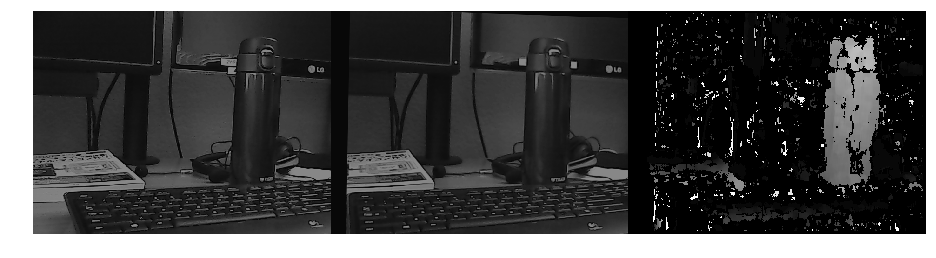

In [78]:
stereo = cv2.StereoBM_create(numDisparities=32, blockSize=15)
# im2_aligned_gray = cv2.cvtColor(im2_aligned, cv2.COLOR_BGR2GRAY)
im2_aligned_gray = cv2.cvtColor(im2_aligned, cv2.COLOR_BGR2GRAY)
disparity = stereo.compute(im1_gray, im2_aligned_gray)
figure(figsize=(16, 8))
im3 = hstack((im1_gray, im2_aligned_gray, disparity))
plt.imshow(im3, 'gray')
axis('off')
plt.show()